In [1]:
import pandas as pd

In [2]:
import time

_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [3]:
columnheaders = ['buying',
             'maint',
             'doors',
             'persons',
             'lug_boot',
             'safety',
             'class']

In [4]:
#Data Source http://archive.ics.uci.edu/ml/datasets/Solar+Flare

path = 'C:\\Users\\Peter\\Desktop\\Thinkful\\Thinkful-Lessons\\Thinkful 3.2 Random Forests\\car.data'
df = pd.read_csv(path, header = None, names = columnheaders)

In [5]:
#take the data and append it to itself over and over until its significant enough in size to make runtimes significant
for x in range(12):
    df = df.append(df)

In [6]:
df.shape

(7077888, 7)

In [7]:
features = pd.get_dummies(df.drop('class', axis = 1))

In [8]:
classes = df['class'].unique()

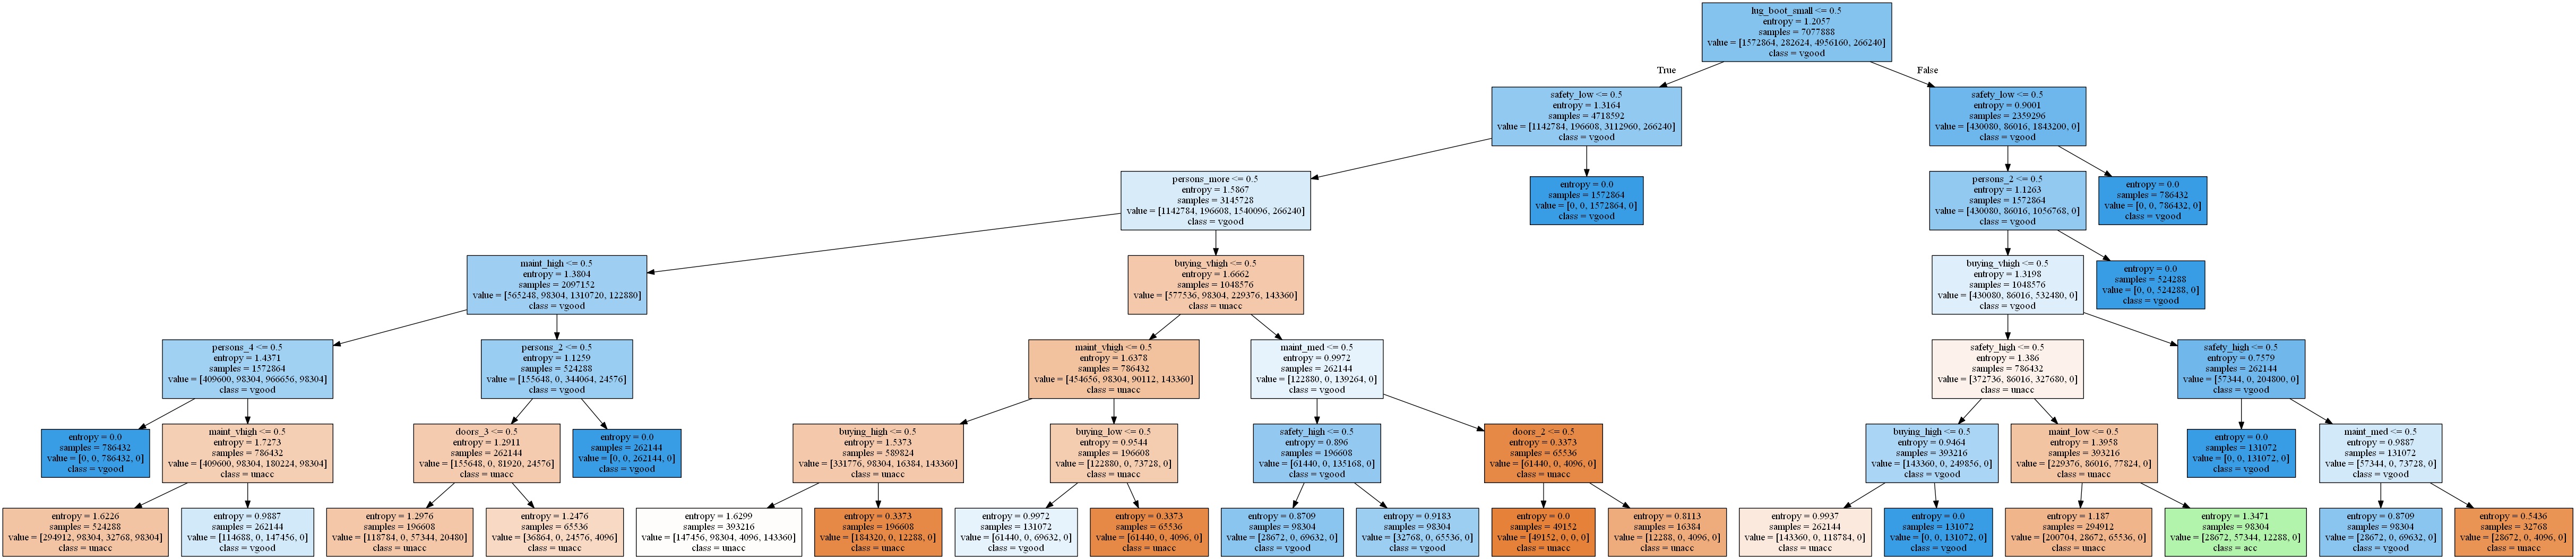

In [9]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=6,
)
tic()
decision_tree.fit(features, df['class'])

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features.columns,
    class_names=classes,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [10]:
tac()

Time passed: 0hour:0min:21sec


In [11]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = features
Y = df['class']
tic()
rfc.fit(X, Y)
tac()

Time passed: 0hour:1min:32sec


In [12]:
tic()
score = cross_val_score(rfc, X, Y, cv=5)
print(score.mean())
tac()

1.0
Time passed: 0hour:7min:5sec


In [13]:
X.shape

(7077888, 21)